In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


some **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


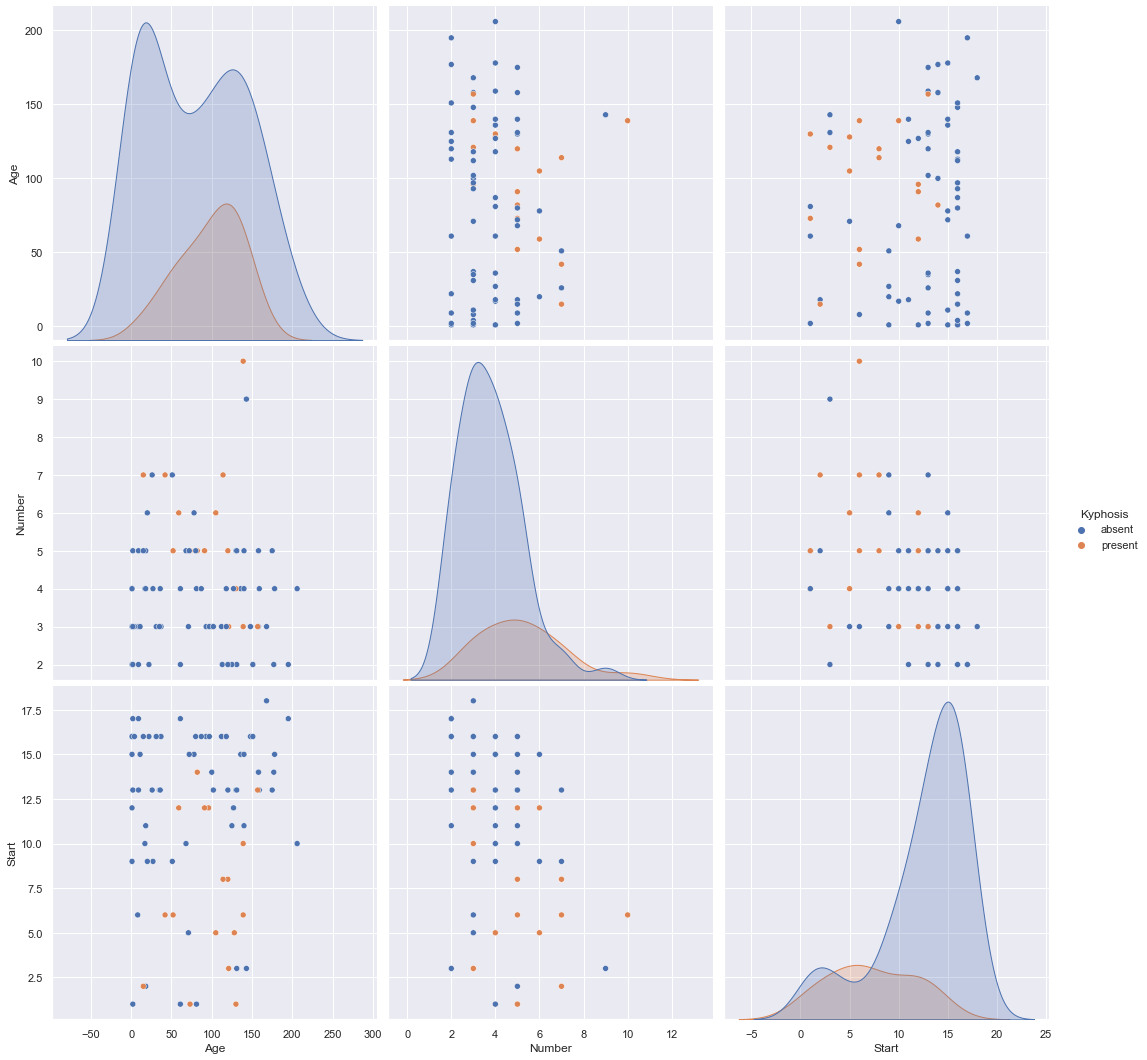

In [4]:
sns.set_theme()
sns.pairplot(df, hue = 'Kyphosis', height = 5)

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training a decision tree model

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation

In [8]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[16  5]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.80      0.76      0.78        21
     present       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27



### Training a Random Forest model

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators = 200)

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Predictions and Evaluation

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[20  1]
 [ 5  1]]
              precision    recall  f1-score   support

      absent       0.80      0.95      0.87        21
     present       0.50      0.17      0.25         6

    accuracy                           0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27

